# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [83]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('data/human_body_temperature.csv')
#https://plot.ly/python/normality-test/   正态分布检验
stats.shapiro(df.temperature)
# the null hypothesis is normal distribution, here we can't reasonably reject the null hyphthesis as the p-value=0.233.

(0.9865770936012268, 0.233174666762352)

In [ ]:
#data is big enough since we have 130 observations which is enough to use z-stat.
#also, our sample should be independent because the temperature in human body has no relationship between each other.

p =  0.5064
0.0
0.631035125585
Ttest_1sampResult(statistic=-1.2600516570434861, pvalue=0.23934144645602481)
0.674472874815
confidence level =  ( 99.6807057117 , 96.8177558267 )
1.43147494248
98.1046153846154 0.6933598841828696
98.39384615384613 0.7377464486428966


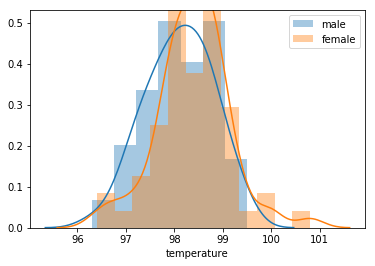

In [95]:
def bootstrap_replicate_1d(data , func):
     """Generate bootstrap replicate of 1D data."""
     bs_sample = np.random.choice(data, len(data))
     return func(bs_sample)
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
bs_replicates = draw_bs_reps(df.temperature,np.mean,10000)
mean_tem = np.mean(df.temperature)
p = np.sum(bs_replicates <= mean_tem) / 10000
print('p = ', p)
#----------------
#Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
tem_shifted = df.temperature-np.mean(df.temperature)+98.6
def diff(data,a=98.6):
    return np.mean(data)-a
difference=diff(df.temperature)
tem_replicates = draw_bs_reps(tem_shifted,diff,10000)
p_value=np.sum(tem_replicates<=difference)/10000
print(p_value)
#--------------
#In this situation, is it appropriate to use the t or z statistic?
# z, large sample
z_score=(98.6 - mean_tem)/np.std(df.temperature)
p_value_1 = scipy.stats.norm.sf(abs(z_score))*2 
print(p_value_1)
#---------------------
#Draw a small sample of size 10 from the data and repeat both frequentist tests.
sample=np.random.choice(df.temperature,10)
t_test = scipy.stats.ttest_1samp(sample, 98.6)
print(t_test)
#can't reject null
# one sample z test
z_score2=(98.6 - np.mean(sample))/np.std(sample)
p_value_2 = scipy.stats.norm.sf(abs(z_score2))*2 
print(p_value_2)
#can't reject
#------------------- LOOK AT HERE,QUESTION!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Why error?

def bootstrap_replicate_1d(data_tem, func):
    return func(np.random.choice(data_tem, size=len(data_tem)))
def draw_bs_reps(data_tem, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data_tem,func)

    return bs_replicates
bs_replicates = draw_bs_reps(df.temperature,mean_tem,size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'temperature')
#-----------------------
#At what temperature should we consider someone's temperature to be "abnormal"?
mean, sigma = np.mean(df.temperature), np.std(df.temperature)
high, low = stats.norm.interval(0.95, loc=mean, scale=sigma)
print('confidence level = ','(', low ,',', high ,')')
margin_error=low-mean_tem
print(margin_error)
#-------------------------
#Is there a significant difference between males and females in normal temperature?
#distract female&male temperature
male_tem=df.temperature[df.gender=='M']
female_tem=df.temperature[df.gender == "F"]
print(np.mean(male_tem),np.std(male_tem))
print(np.mean(female_tem),np.std(female_tem))
# male&female temperatures have different mean&sigma, here I planed to use two samples z test
# But I didn't find many references online, so I use t-test, whitch is more conservative than z test.
stats.ttest_ind(male_tem,female_tem,equal_var = False)
# here we reject the null hypothesis, meaning there a significant difference between males&females in normal temperatur
sns.distplot(male_tem,label ='male')
sns.distplot(female_tem,label='female')
plt.legend()
plt.show()

In [ ]:
def bootstrap_replicate_1d(data_tem, func):
    return func(np.random.choice(data_tem, size=len(data_tem)))
def draw_bs_reps(data_tem, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data_tem,func)

    return bs_replicates
bs_replicates = draw_bs_reps(df.temperature,mean_tem,size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'temperature')